In [115]:
library(tidyverse)
data = read_csv("data/survey_2018.csv")
re_data = read_csv("data/re_sample_2021.csv")

Rows: 100 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): transect_id, coverage

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 25 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): transect_id, coverage_2018, coverage_2021

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [9]:
data
re_data

transect_id,coverage
1,26
2,32
3,21
4,21
5,26
6,23
7,15
8,18
9,24
10,23


transect_id,coverage_2018,coverage_2021
1,46,24
2,20,22
3,10,26
4,18,21
5,11,30
6,56,21
7,38,22
8,40,35
9,57,27
10,50,23


In [116]:
null_dist = replicate(1000, mean(sample(data$coverage, 25, replace=TRUE)))

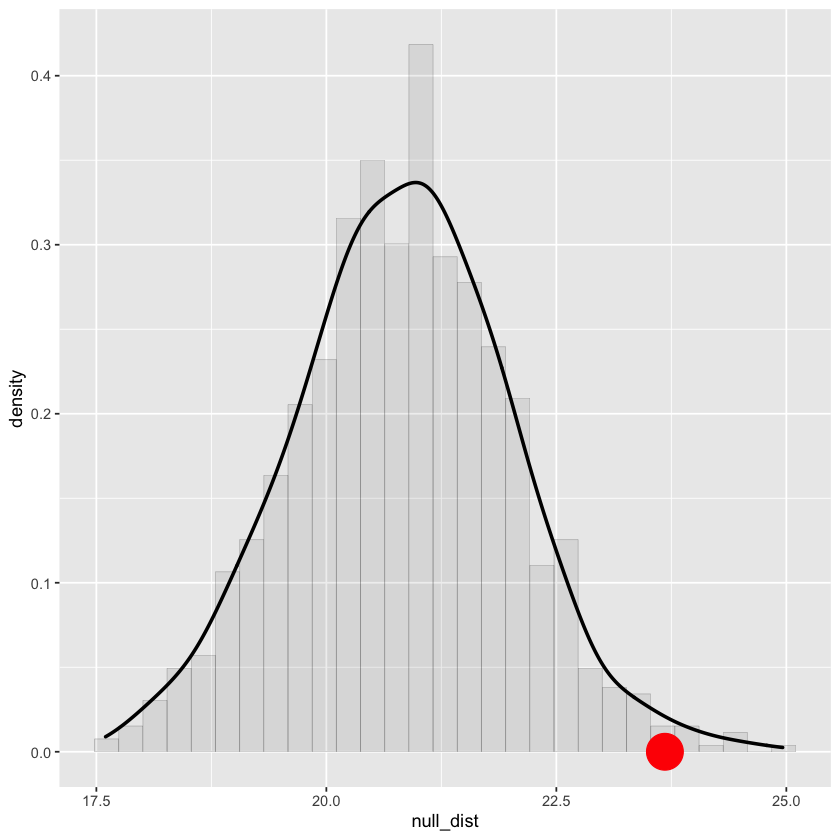

In [119]:
ggplot() + 
  geom_histogram(aes(x=null_dist, y=..density..), bins = 29, alpha=0.1, color="black", size=0.05) +
  geom_density(aes(x=null_dist), color="black", size=1, bw=0.3) + 
  geom_point(aes(x=23.68, y=0), size=10, color="red")

In [121]:
sum(null_dist >=23.68)/1000

[1] 0.013

# p-value = 0.013, suggest statistically different from null. Coverage in 2021 is statistically significantly higher than coverage in 2018

# _

# _


## Below is done using a t-test. Kept below for future reference, but the above seems to be the correct way to answer the question based on slack explantion

In [93]:
t.test(null_dist, y=re_data$coverage_2021)


	Welch Two Sample t-test

data:  null_dist and re_data$coverage_2021
t = -2.406, df = 24.044, p-value = 0.02418
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.2640101 -0.4031099
sample estimates:
mean of x mean of y 
 20.84644  23.68000 


Welch Two Sample t-test

data:  null_dist and re_data$coverage_2021
t = -2.406, df = 24.044, p-value = 0.02418
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.2640101 -0.4031099
sample estimates:
mean of x mean of y 
 20.84644  23.68000 

# p-value= 0.02418, suggest statistically different from null. Coverage in 2021 is statistically significantly higher than coverage in 2018

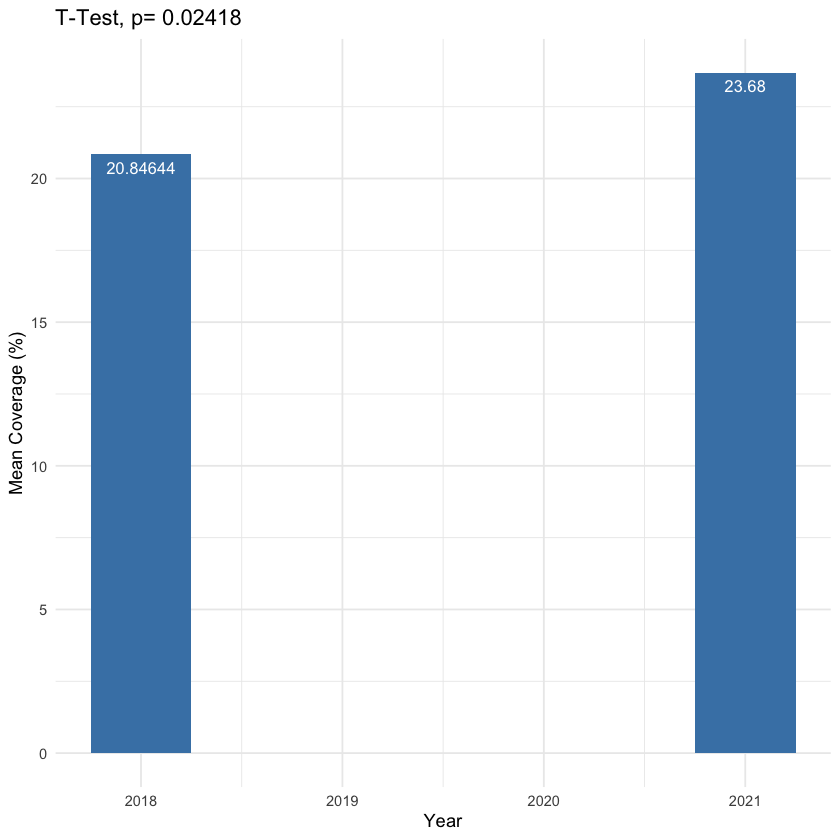

In [114]:
df = data.frame(mean=c(20.84644, 23.68000), year=c(2018, 2021))
ggplot(df, aes(x=year, y=mean))+
    geom_bar(stat="identity", width=0.5, fill="steelblue")+
    geom_text(aes(label=mean), vjust=1.6, color="white", size=3.5)+
    labs(title="T-Test, p= 0.02418", x="Year", y="Mean Coverage (%)")+
    theme_minimal()